# HAMOYE STAGE C
 LOGISTIC REGRESSION

In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd

#Load dataset
df = pd.read_csv("Data_for_UCI_named.csv")
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [2]:
#drop stab column from the dataset
dz=df.drop(columns="stab")
dz

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [3]:
#more preprocessing
X = dz.drop(columns='stabf')
y = dz['stabf']

In [5]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


unstable    5092
stable      2908
Name: stabf, dtype: int64

# Importing StandardScaler
The idea behind StandardScaler is that it will transform your data such 
that its distribution will have a mean value 0 and standard deviation of 1.

In [6]:
# Using StandardScaler on split data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_train=scaler.fit_transform(x_train)
scaler_test=scaler.transform(x_test)

# RandomForestClassifier
The random forest is a classification algorithm consisting of many decisions trees.
It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by
committee is more accurate than that of any individual tree

In [7]:
#Using random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(scaler_train, y_train)
y_pred=classifier.predict(scaler_test)

In [8]:
#evaluating performance of random forest classifier model
from sklearn.metrics import  confusion_matrix, accuracy_score

print((confusion_matrix(y_test,y_pred)))
print("{:.6f}".format(accuracy_score(y_test,y_pred)))

[[ 625   87]
 [  55 1233]]
0.929000


# XGBCLASSIFIER
XGBoost is a decision-tree-based ensemble Machine Learning algorithm
that uses a gradient boosting framework. In prediction problems involving
unstructured data (images, text, etc.) artificial neural networks tend to
outperform all other algorithms or frameworks. However, when it comes to
small-to-medium structured/tabular data, decision tree based algorithms are
considered best-in-class right now.


In [9]:
import xgboost
print(xgboost.__version__)

1.1.1


In [10]:
#Using xgboost classifier
from xgboost import XGBClassifier
extreme1 = XGBClassifier(random_state=1,learning_rate=0.1,max_depth=3)
extreme1.fit(scaler_train, y_train)
extreme1_pred = extreme1.predict(scaler_test)

In [11]:
#evaluating performance of xgboost classifier model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print((confusion_matrix(y_test,y_pred)))
print("{:.6f}".format(accuracy_score(y_test,extreme1_pred)))

[[ 625   87]
 [  55 1233]]
0.919500


# LIGHTGBMCLASSIFIER
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.Also, it is surprisingly very fast, hence the word ‘Light’.

In [12]:
 #installing lightgbm classifier
    pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [13]:
#Using lightgbm classifier
import lightgbm as lgb

lg = lgb.LGBMClassifier(random_state=1)
lg.fit(scaler_train, y_train)
lg_pred=lg.predict(scaler_test)

In [14]:
#evaluating performance of lightgbm classifier model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,lg_pred))
print((accuracy_score(y_test,lg_pred)))

0.9375


# EXTRATREECLASSIFIER
The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. 
Predictions are made by averaging the prediction of the decision trees
in the case of regression or using majority voting in the case of classification.

In [15]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(scaler_train, y_train)
tree_pred = tree.predict(scaler_test)

In [28]:
#evaluating performance of exta tree classifier model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,tree_pred))
print(accuracy_score(y_test,tree_pred))
 

[[ 606  106]
 [  38 1250]]
0.928


# Tree tuning using hyper parameters setting
Now to improve the Extra Trees Classifier, you will use the following parameters

Number of estimators
Minimum number of samples,
Minimum number of samples for leaf node and
The number of features to consider when looking for the best split

For the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).

In [29]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(tree, hyperparameter_grid, n_iter=10,cv=5,scoring='accuracy', n_jobs=-1,verbose =1, random_state= 1)
search = clf.fit(scaler_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


In [33]:
#checking for the best parameter for the model
search.best_params_.values()


dict_values([1000, 2, 8, None])

In [34]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None,random_state=1)
tree_param.fit(scaler_train, y_train)
tree_param_pred = tree_param.predict(scaler_test)

In [35]:
#evaluating performance of optimized model
from sklearn.metrics import  confusion_matrix, accuracy_score

print((confusion_matrix(y_test,tree_param_pred)))
print("{:.4f}".format(accuracy_score(y_test,tree_param_pred)))

              precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 619   93]
 [  53 1235]]
0.9270


# Performing Feature Selection
Feature Selection is the process where you automatically or manually select those features which contribute most to your 
prediction variable or output in which you are interested in.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

[0.13723975 0.1405075  0.13468029 0.13541676 0.00368342 0.00533686
 0.00542927 0.00496249 0.10256244 0.10757765 0.11306268 0.10954089]


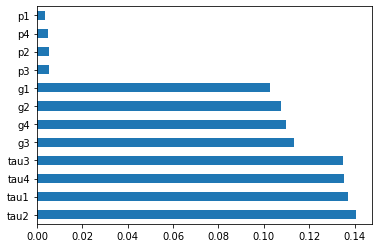

In [36]:
#importing library to plot a graph
import matplotlib.pyplot as plt

#use inbuilt class feature_importances of tree based classifiers
print(tree_param.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(tree_param.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()


In [1]:
#Let: Precision =P Recall=R TruePositive=TP TrueNegative=TN FalsePositive=FP FalseNegative=FN
TP=355;FP=1480;FN=45;
P=(TP/(TP+FP))
P

0.19346049046321526

In [2]:
R=(TP/(TP+FN))
R

0.8875

In [3]:
F1_score=(2*((P*R)/(P+R)))
F1_score

0.3176733780760626

In [ ]:
#calculate recall,false positve rate and cost 
#Recall=(TP/(TP+FN))
#False Positive Rate(FPR)=(FP/(FP+TN))
#Cost=(5*(FP+FN))